In [ ]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


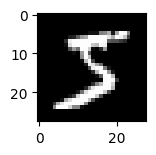

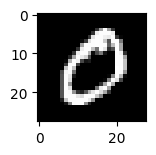

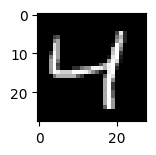

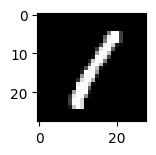

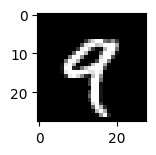

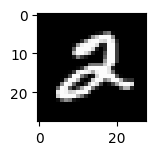

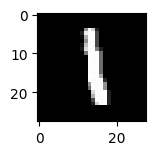

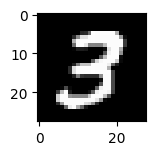

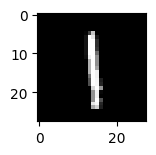

In [ ]:
from matplotlib import pyplot
for i in range(9):
  pyplot.subplot(330 + 1 + i)
  pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
  pyplot.show()

In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

X_train = X_train / 255
X_test = X_test / 255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


In [ ]:
model = Sequential()
model.add(Dense(num_pixels, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10, verbose=2)

Epoch 1/5
6000/6000 - 17s - 3ms/step - accuracy: 0.9453 - loss: 0.1779 - val_accuracy: 0.9694 - val_loss: 0.0975
Epoch 2/5
6000/6000 - 20s - 3ms/step - accuracy: 0.9755 - loss: 0.0777 - val_accuracy: 0.9758 - val_loss: 0.0803
Epoch 3/5
6000/6000 - 15s - 2ms/step - accuracy: 0.9837 - loss: 0.0537 - val_accuracy: 0.9772 - val_loss: 0.0830
Epoch 4/5
6000/6000 - 21s - 3ms/step - accuracy: 0.9869 - loss: 0.0422 - val_accuracy: 0.9796 - val_loss: 0.0797
Epoch 5/5
6000/6000 - 22s - 4ms/step - accuracy: 0.9891 - loss: 0.0330 - val_accuracy: 0.9808 - val_loss: 0.0784


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
# print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Baseline Error: 1.92%


In [ ]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 98.08%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


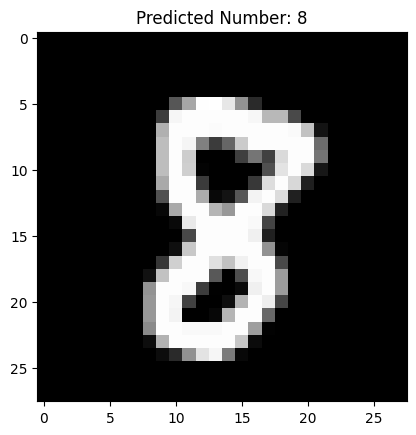

In [ ]:
image_index = np.random.randint(0, len(X_test))
image = X_test[image_index]

image = image.reshape(1, 784)

prediction = model.predict(image)

predicted_class = np.argmax(prediction)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Number: {predicted_class}")
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


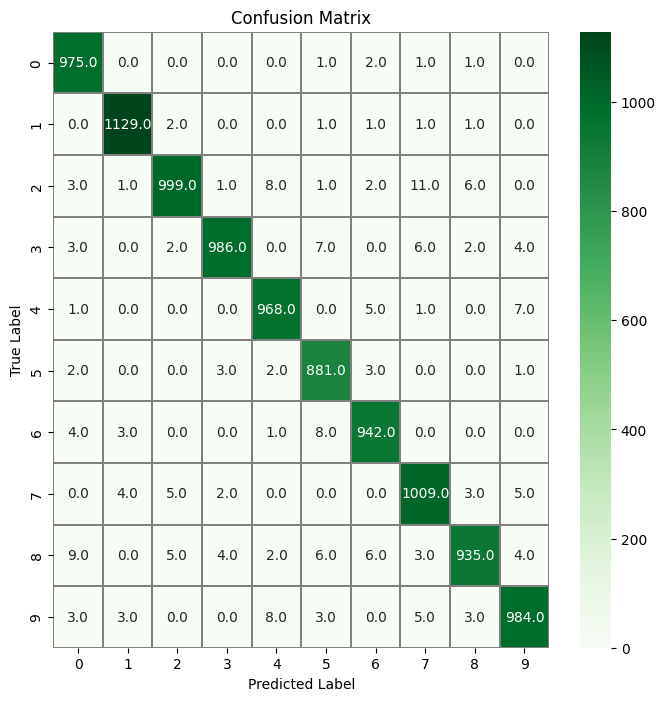

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the values from the validation dataset
Y_pred = model.predict(X_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred,axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test,axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Enter an image index between 0 and 9999: 852
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


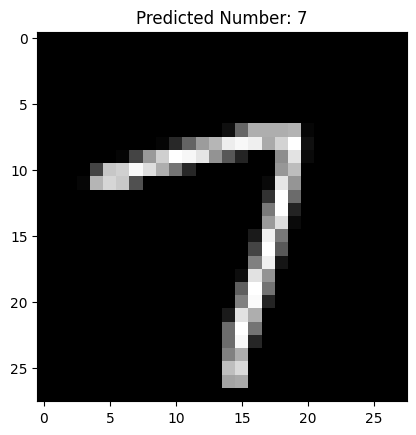

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

while True:
    try:
        image_index = int(input("Enter an image index between 0 and {}: ".format(len(X_test) - 1)))
        if 0 <= image_index < len(X_test):
            break
        else:
            print("Invalid index. Please enter a number within the range.")
    except ValueError:
        print("Invalid input. Please enter an integer.")

image = X_test[image_index]
image = image.reshape(1, 784)

prediction = model.predict(image)
predicted_class = np.argmax(prediction)

plt.imshow(image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Number: {predicted_class}")
plt.show()